In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import torch.nn.functional as F

In [3]:
from torchvision import datasets,transforms

In [4]:
transform=transforms.Compose([transforms.Resize((28,28)),transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])
training_data=datasets.MNIST(root='./data',download=True,train=True,transform=transform)
val_data=datasets.MNIST(root='./data',download=True,train=False,transform=transform)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [5]:
def image_conv(tensor):
  image=tensor.clone().detach().numpy()
  image=image.transpose(1,2,0)
  image=image*np.array((0.5,0.5,0.5))+np.array((0.5,0.5,0.5))
  image.clip(0,1)
  return image

In [6]:
training_loader=torch.utils.data.DataLoader(dataset=training_data,batch_size=100,shuffle=True)
val_loader=torch.utils.data.DataLoader(dataset=val_data,batch_size=100,shuffle=False)

In [7]:
dataiter=iter(training_loader)
images,labels=dataiter.next()

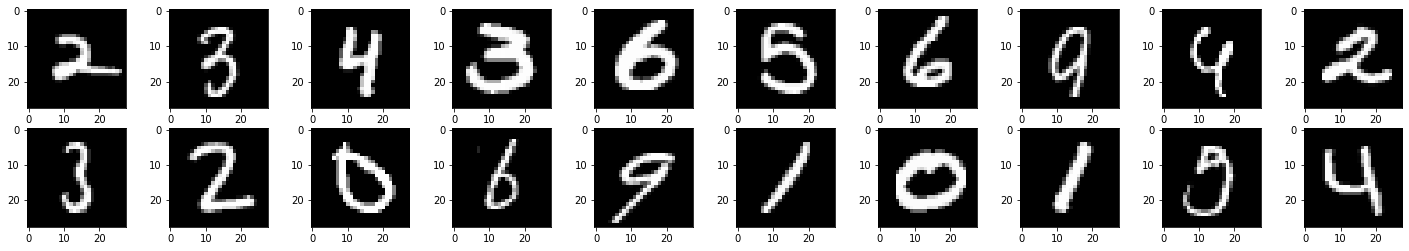

In [8]:
plt.figure(figsize=(25,4))
for i in range(20):
  plt.subplot(2,10,i+1)
  plt.imshow(image_conv(images[i]))

In [9]:
class classifier(nn.Module):
  def __init__(self,input_size,h1,h2,out):
    super().__init__()
    self.linear1=nn.Linear(input_size,h1)
    self.linear2=nn.Linear(h1,h2)
    self.linear3=nn.Linear(h2,out)
  def forward(self,x):
    x=F.relu(self.linear1(x))
    x=F.relu(self.linear2(x))
    x=self.linear3(x)
    return x

In [10]:
model=classifier(784,125,65,10)

In [11]:
criterion=nn.CrossEntropyLoss()
optimiser=torch.optim.Adam(params=model.parameters(),lr=0.01)

In [ ]:
epochs=10
running_loss_history=[]
accuracy_list=[]
val_running_loss_history=[]
val_acc_list=[]
for i in range(epochs):
  running_loss=0.0
  running_acc=0.0
  val_running_loss=0.0
  val_running_acc=0.0
  for inputs,labels in training_loader:
    inputs=inputs.view(inputs.shape[0],-1)
    outputs=model.forward(inputs)
    _,preds=(torch.max(outputs,1))
    running_acc+=torch.sum(preds==labels.data)
    loss=criterion(outputs,labels)
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    running_loss+=loss.item()
  else:
      with torch.no_grad():
        for val_inputs,val_labels in val_loader:
          val_inputs=val_inputs.view(val_inputs.shape[0],-1)
          val_output=model.forward(val_inputs)
          loss=criterion(val_output,val_labels)
          _,val_preds=torch.max(val_output,1)
          val_running_loss+=loss.item()
          val_running_acc+=torch.sum(val_preds==val_labels.data)
      epoch_loss=running_loss/len(training_loader)
      epoch_acc=running_acc.float()/len(training_loader)
      running_loss_history.append(running_loss)
      accuracy_list.append(epoch_acc.item())
      val_epoch_loss=val_running_loss/len(val_loader)
      val_epoch_acc=val_running_acc.float()/len(val_loader)
      val_running_loss_history.append(val_epoch_loss)
      val_acc_list.append(val_epoch_acc)
      print("The epoch loss is {:.4f} and epoch accuracy is {:.4f}".format(val_epoch_loss,val_epoch_acc.item()))
      print("The epoch val loss is {:.4f} and epoch val accuracy is {:.4f}".format(epoch_loss,epoch_acc.item()))

The epoch loss is 0.2102 and epoch accuracy is 93.7600
The epoch val loss is 0.3787 and epoch val accuracy is 88.1333
The epoch loss is 0.2106 and epoch accuracy is 94.1100
The epoch val loss is 0.2168 and epoch val accuracy is 93.4650
The epoch loss is 0.2187 and epoch accuracy is 93.8200
The epoch val loss is 0.1960 and epoch val accuracy is 94.2500
The epoch loss is 0.1760 and epoch accuracy is 94.9600
The epoch val loss is 0.1858 and epoch val accuracy is 94.5050
The epoch loss is 0.1998 and epoch accuracy is 94.6200
The epoch val loss is 0.1774 and epoch val accuracy is 94.7800
The epoch loss is 0.1476 and epoch accuracy is 95.6500
The epoch val loss is 0.1785 and epoch val accuracy is 94.9050
The epoch loss is 0.1895 and epoch accuracy is 94.8900
The epoch val loss is 0.1770 and epoch val accuracy is 94.9967
The epoch loss is 0.1696 and epoch accuracy is 95.2100
The epoch val loss is 0.1652 and epoch val accuracy is 95.3733
The epoch loss is 0.1795 and epoch accuracy is 95.4500
T

In [ ]:
import requests
from PIL import Image
url='https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response=requests.get(url,stream=True)
imag=Image.open(response.raw)
plt.imshow(imag)

In [ ]:
import PIL

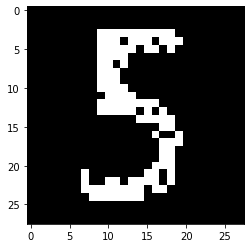

In [ ]:
img=PIL.ImageOps.invert(imag)
img=img.convert('1')
img=transform(img)
plt.imshow(image_conv(img))

In [ ]:
img=img.view(img.shape[0],-1)
outputs=model(img)
_,pred=(torch.max(outputs,1))
print(pred.item())

5


In [ ]:
dataiter=iter(val_loader)
images,labels=dataiter.next()

In [ ]:
print(len(val_loader))

100


In [ ]:
fig=plt.figure(figsize=(25,4))
for i in range(20):
  ax=fig.add_subplot(2,10,i+1)
  plt.imshow(image_conv(images[i]))
  img=images[i]
  img=img.view(img.shape[0],-1)
  output=model.forward(img)
  _,pred=(torch.max(output,1))
  pred=pred.item()
  ax.set_title([pred])